In [1]:
import pandas as pd
import numpy as np


In [2]:
dane = pd.read_csv('Data/df_enriched.csv')
pd.options.display.max_columns=75
dane.head()

,Unnamed: 0,data_zdarzenia,godzina,GPS_x,GPS_y,miejscowosc,ulica,numer_domu,numer_drogi,pikietaz,obszar,skrzyzowanie,geometria_drogi,charakterystyka_miejsca,oswietlenie,rodzaj_zdarzenia,wina,rodzaj_drogi,nawierzchnia_twarda,stan_nawierzchni,sygnalizacja,oznakowanie_poziome,liczba_pasow,zachowanie_kierujacego,zachowanie_pieszego,inne_przyczyny,liczba_rannych,liczba_zabitych,liczba_kolizji,liczba_wypadkow,rok,miesiac,dzien_miesiąca,dzien_tygodnia,data,czy_weekend,handlowa,Skrzyżowanie,pogoda_dobre_warunki,pogoda_pochmurno,pogoda_mgla,pogoda_dym,pogoda_oslep_slonce,pogoda_opady,pogoda_snieg,pogoda_grad,pogoda_deszcz,pogoda_wiatr,nawierzchnia_sucha,nawierzchnia_mokra,nawierzchnia_oblodzona,nawierzchnia_zasniezona,nawierzchnia_nierowna,nawierzchnia_kaluze,nawierzchnia_zanieszyszczenia,zachowanie_kierujacego_niepr_cofanie,zachowanie_kierujacego_niepr_omijanie,zachowanie_kierujacego_niedost_predkosci,zachowanie_kierujacego_nieudzielenie_pierw,zachowanie_kierujacego_niepr_skrecanie,zachowanie_kierujacego_niezachowanie_odl,zachowanie_kierujacego_niepr_zmiana_pasa,zachowanie_kierujacego_zmeczenie,zachowanie_kierujacego_niepr_wymijanie,zachowanie_kierujacego_nieprzestrz_znakow,zachowanie_kierujacego_niestos_do_sygn,zachowanie_kierujacego_nieust_przejazdu,zachowanie_kierujacego_nieust_pieszemu,zachowanie_kierujacego_gwalt_hamowanie,zachowanie_kierujacego_niepr_wyprzedzanie,zachowanie_kierujacego_niepr_zatrzymanie,zachowanie_kierujacego_niepr_zawracanie,zachowanie_kierujacego_niepr_przejazd_rowerowy,zachowanie_kierujacego_jazda_bez_swiatel,zachowanie_kierujacego_inne_przyczyny
0,0,2016-01-01,5,18.635806,50.369722,GLIWICE,TOSZECKA,NaN,901,61.6,0.0,NaN,odcinek prosty,jezdnia,Noc - droga nieoświetlona,Najechanie na zwierzę,z innych przyczyn,jednojezdniowa dwukierunkowa,NaN,sucha,0,0.0,2.0,NaN,NaN,"Obiekty, zwierzęta na drodze",0,0,1,0,2016,1,1,4,2016-01-01,0,2,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2016-01-01,0,19.180833,50.323083,DĄBROWA GÓRNICZA,SIENKIEWICZA,NaN,G200 030S,NaN,1.0,Z drogą z pierwsz.,NaN,jezdnia,Noc - droga oświetlona,Najechanie na pojazd unieruchomiony,z winy kierującego,jednojezdniowa dwukierunkowa,NaN,sucha,0,0.0,NaN,nieprawidłowe cofanie,NaN,NaN,0,0,1,0,2016,1,1,4,2016-01-01,0,2,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2016-01-01,18,18.877639,50.445083,TARNOWSKIE GÓRY,KS.IGNACEGO SIWCA,4A,GMINNA,NaN,1.0,NaN,zakręt łuk,jezdnia,Noc - droga oświetlona,Najechanie na pojazd unieruchomiony,z winy kierującego,jednojezdniowa dwukierunkowa,NaN,sucha,0,1.0,2.0,nieprawidłowe omijanie,NaN,NaN,0,0,1,0,2016,1,1,4,2016-01-01,0,2,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2016-01-01,15,18.860583,50.444667,TARNOWSKIE GÓRY,JÓZEFA PIŁSUDSKIEGO,6,P3276S,NaN,1.0,NaN,odcinek prosty,jezdnia,Dzień,Zderzenie pojazdów tylne,z winy kierującego,jednojezdniowa dwukierunkowa,NaN,sucha,0,0.0,2.0,nieprawidłowe omijanie,NaN,NaN,0,0,1,0,2016,1,1,4,2016-01-01,0,2,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,2016-01-01,17,19.047556,50.466806,OŻAROWICE,DWORCOWA,16,P3203S,NaN,1.0,NaN,odcinek prosty,jezdnia,"Świt, zmrok",Najechanie na zwierzę,z innych przyczyn,jednojezdniowa dwukierunkowa,NaN,sucha,0,1.0,2.0,NaN,NaN,"Obiekty, zwierzęta na drodze",0,0,1,0,2016,1,1,4,2016-01-01,0,2,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
dane.columns


Index(['Unnamed: 0', 'data_zdarzenia', 'godzina', 'GPS_x', 'GPS_y',
       'miejscowosc', 'ulica', 'numer_domu', 'numer_drogi', 'pikietaz',
       'obszar', 'skrzyzowanie', 'geometria_drogi', 'charakterystyka_miejsca',
       'oswietlenie', 'rodzaj_zdarzenia', 'wina', 'rodzaj_drogi',
       'nawierzchnia_twarda', 'stan_nawierzchni', 'sygnalizacja',
       'oznakowanie_poziome', 'liczba_pasow', 'zachowanie_kierujacego',
       'zachowanie_pieszego', 'inne_przyczyny', 'liczba_rannych',
       'liczba_zabitych', 'liczba_kolizji', 'liczba_wypadkow', 'rok',
       'miesiac', 'dzien_miesiąca', 'dzien_tygodnia', 'data', 'czy_weekend',
       'handlowa', 'Skrzyżowanie', 'pogoda_dobre_warunki', 'pogoda_pochmurno',
       'pogoda_mgla', 'pogoda_dym', 'pogoda_oslep_slonce', 'pogoda_opady',
       'pogoda_snieg', 'pogoda_grad', 'pogoda_deszcz', 'pogoda_wiatr',
       'nawierzchnia_sucha', 'nawierzchnia_mokra', 'nawierzchnia_oblodzona',
       'nawierzchnia_zasniezona', 'nawierzchnia_nierowna',
   

In [4]:
#miejscowosc o największej liczbie wypadków

dane.groupby('miejscowosc').agg({'liczba_wypadkow':'count'}).sort_values(by='liczba_wypadkow', ascending=False).head(1)

,liczba_wypadkow
miejscowosc,
KATOWICE,26912


In [5]:
#miejscowosc o największej liczbie kolizji

dane.groupby('miejscowosc').agg({'liczba_kolizji':'count'}).sort_values(by='liczba_kolizji', ascending=False).head(1)

,liczba_kolizji
miejscowosc,
KATOWICE,26912


<h1 span style="color:blue">Liczba wypadków przypadająca na 1000 mieszkańców

In [6]:
ludnosc = pd.read_excel('ludnosc2019.xls', sheet_name='Tablica 7', usecols=['Unnamed: 0','Unnamed: 2'])

In [7]:
ludnosc.columns

Index(['Unnamed: 0', 'Unnamed: 2'], dtype='object')

In [8]:
ludnosc.rename(columns={'Unnamed: 0':'miasta', 'Unnamed: 2':'liczba_ludnosci'}, inplace=True)

In [9]:
ludnosc.dropna(how='any')

,miasta,liczba_ludnosci
5,WOJEWÓDZTWA VOIVODSHIPS MIASTA ...,2018
8,Dolnośląskie,1990503
9,Wrocław,640648
10,Wrocław - Fabryczna,207032
11,Wrocław - Krzyki,177337
...,...,...
982,Tychowo,2517
983,Wałcz,25359
984,Węgorzyno,2831
985,Wolin,4828


In [10]:
ludnosc['miasta']=ludnosc['miasta'].str.upper()

In [11]:
dane['ludnosc'] = ludnosc['miasta'].apply(lambda x: ludnosc['liczba_ludnosci'] if x in dane['miejscowosc'] else 0)
#czemu to nie działa???

In [12]:
ludnosc.head(10)

,miasta,liczba_ludnosci
0,TABL. 7. LUDNOŚĆ W MIASTACH 2017 I 2018,NaN
1,STAN W DNIU 31 GRUDNIA,NaN
2,URBAN POPULATION IN 2017 AND 2018,NaN
3,AS OF 31ST DECEMBER,NaN
4,NaN,NaN
5,WOJEWÓDZTWA VOIVODSHIPS MIASTA ...,2018
6,NaN,ogółem total
7,NaN,NaN
8,DOLNOŚLĄSKIE,1990503
9,WROCŁAW,640648


<h1 span style="color:blue">Rozkład wypadków w czasie (dzień, mc, dzień tygodnia, niedziela hadlowa, weekend)

In [13]:
#Liczba wypadków wg roku

dane.groupby(['rok']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False) 

,liczba_wypadkow
rok,
2016,3678
2017,3519
2018,3237
2019,2964


<span style="color:blue">Zauważalna tendencja spadkowa liczby wypadków w latach 2016-2019

In [14]:
#Liczba wypadków wg miesiąca

dane.groupby(['miesiac']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False).head()

,liczba_wypadkow
miesiac,
10,1301
9,1287
6,1274
7,1248
8,1240


In [15]:
(dane
     .groupby(['miesiac','obszar'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False))

#1-zabudowany
#0-niezabudowany

,,liczba_wypadkow
miesiac,obszar,
10,1.0,1048
6,1.0,1040
9,1.0,1010
8,1.0,992
7,1.0,977
12,1.0,974
5,1.0,922
4,1.0,892
11,1.0,886


<span style="color:blue">Wnioski: Liczba wypadków jest największa w miesiącach od czerwca do października w obszarze zabudowanym.
    

In [16]:
#Liczba wypadków wg. daty

dane.groupby(['data']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False).head()

,liczba_wypadkow
data,
2016-06-07,26
2018-04-20,25
2016-10-03,25
2016-01-12,25
2017-07-30,23


In [71]:
#liczba wypadków wg dnia miesiąca

dzien_mies = (dane
    .groupby(['dzien_miesiąca'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='dzien_miesiąca'))

print(f"Dni miesiąca z najmniejszą liczbą wypadków: {dzien_mies['liczba_wypadkow'].nsmallest(3)}")
print(f"Dni miesiąca z największą liczbą wypadków: {dzien_mies['liczba_wypadkow'].nlargest(3)}")
dzien_mies.head()

Dni miesiąca z najmniejszą liczbą wypadków: dzien_miesiąca
31    264
24    387
18    400
Name: liczba_wypadkow, dtype: int64
Dni miesiąca z największą liczbą wypadków: dzien_miesiąca
12    477
13    474
7     467
Name: liczba_wypadkow, dtype: int64


,liczba_wypadkow
dzien_miesiąca,
1,405
2,444
3,436
4,450
5,464


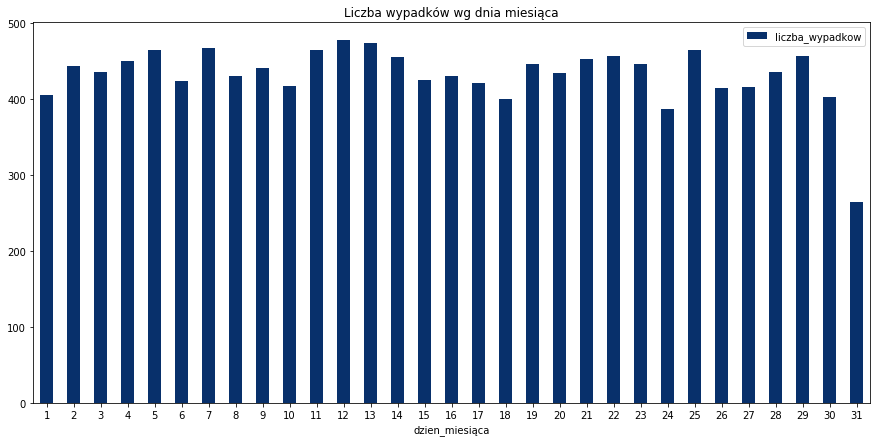

In [61]:
#zróbmy prosty wykres

import matplotlib.pyplot as plt


dzien_mies['liczba_wypadkow'].plot(kind = 'bar', figsize = (15,7),rot=360, title = 'Liczba wypadków wg dnia miesiąca', legend = True, colormap = 'Blues_r');

<span style="color:blue"> Wnioski

In [17]:
#Liczba wypadków wg. dnia tygodnia

dane.groupby(['dzien_tygodnia']).agg({'liczba_wypadkow':'sum'}).sort_values(by='liczba_wypadkow', ascending=False).head(7)

,liczba_wypadkow
dzien_tygodnia,
4,2201
0,2108
3,2030
1,1947
2,1913
5,1734
6,1465


<span style="color:blue">Najmniej wypadków ma miejsce w niedzielę, zdecydowanie jest więcej wypadków w dni pracujące vs sobota i niedziela -> wypadki a dojazd do pracy

In [18]:
niedz_handl = dane[(dane['rok'] == 2018) | (dane['rok'] == 2019)] #częściowy zakaz handlu w niedziele zaczął obowiązywać od 2018 roku

print(niedz_handl.groupby(['data'])['handlowa'].unique().value_counts().sort_index())

niedz_handl.groupby(['handlowa']).agg({'liczba_wypadkow':'sum'})


#niedziela niehandlowa 0
#niedziela handlowa 1
#pozostałe dni 2

[0]     68
[1]     36
[2]    626
Name: handlowa, dtype: int64


,liczba_wypadkow
handlowa,
0,426
1,250
2,5525


In [19]:
#średnia liczba wypadków

nh=426//68 #niehandlowa
h=250//36 #handlowa
p=5525//626 #pozostałe
print(f'Liczba wypadków w niedzielę niehandlową: {nh}, handlową: {h}, pozostałe dni: {p}')

Liczba wypadków w niedzielę niehandlową: 6, handlową: 6, pozostałe dni: 8


In [20]:
dane.groupby(['czy_weekend']).agg({'liczba_wypadkow':'sum'})

,liczba_wypadkow
czy_weekend,
0,10199
1,3199


In [21]:
#Średnia liczba wypdków weekend vs pozostałe dni tygodnia

print(dane.groupby(['data'])['czy_weekend'].unique().value_counts().sort_index())

sr_weekend = 3199//418
sr_tydzien = 10199//1043

print(f'Średnia liczba wypadków: w weekend {sr_weekend}, pozostałe dni tygodnia {sr_tydzien}')

[0]    1043
[1]     418
Name: czy_weekend, dtype: int64
Średnia liczba wypadków: w weekend 7, pozostałe dni tygodnia 9


<h1 span style="color:blue">Korelacja wypadków z fazą księżyca :-)

<h1 span style="color:blue">W jakich miejscach jest najwięcej wypadków

In [22]:
(dane
     .groupby(['geometria_drogi'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
geometria_drogi,
odcinek prosty,7121
zakręt łuk,1100
spadek,101
wzniesienie,77
odcinek prosty spadek,34
odcinek prosty wzniesienie,29
zakręt łuk spadek,19
zakręt łuk wzniesienie,6
wierzchołek wzn,2


In [23]:
#zastanawiające...najwięcej wypadków na prostej drodze

In [24]:
#możemy sprawdzić jakie były przyczyny wypadków na prostym odcinku drogi

prosta_droga = dane[dane['geometria_drogi']=='odcinek prosty']
(prosta_droga
         .groupby(['zachowanie_kierujacego'])
         .agg({'liczba_wypadkow':'sum'})
         .sort_values(by='liczba_wypadkow', ascending=False)
         .head(30))

,liczba_wypadkow
zachowanie_kierujacego,
niedostosowanie prędkości do warunków ruchu,952
nieustąpienie pierwszeństwa pieszemu na przejściu dla pieszych,943
niezachowanie bezp odleg między pojazdami,831
nieustąpienie pierwszeństwa przejazdu,640
inne przyczyny,410
nieprawidłowe wyprzedzanie,287
nieprawidłowe zmienianie pasa ruchu,239
nieprawidłowe cofanie,181
nieprawidłowe skręcanie,178


In [25]:
(prosta_droga
     .groupby(['rodzaj_zdarzenia'])
     .agg({'liczba_wypadkow':'sum'})
     .sort_values(by='liczba_wypadkow', ascending=False)
     .head(14))

,liczba_wypadkow
rodzaj_zdarzenia,
Najechanie na pieszego,2592
Zderzenie pojazdów boczne,1311
Zderzenie pojazdów tylne,1287
Zderzenie pojazdów czołowe,465
Wywrócenie się pojazdu,386
Inne,374
Najechanie na drzewo,228
Zdarzenie z pasażerem,135
Najechanie na słup znak,110


In [26]:
(prosta_droga
    .groupby(['godzina'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
godzina,
16,601
17,594
15,568
14,568
18,476


In [27]:
(prosta_droga
    .groupby(['miesiac'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
miesiac,
9,679
10,678
8,668
12,656
7,647


In [28]:
(prosta_droga
    .groupby(['miejscowosc'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
miejscowosc,
KATOWICE,614
CZĘSTOCHOWA,596
SOSNOWIEC,388
ZABRZE,346
GLIWICE,252


In [29]:
(prosta_droga
    .groupby(['obszar'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

#1-obszar zabudowany
#0 -obszar niezabudowany

,liczba_wypadkow
obszar,
1.0,5622
0.0,1499


In [30]:
(prosta_droga
    .groupby(['charakterystyka_miejsca'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
charakterystyka_miejsca,
jezdnia,4850
przejście dla pieszych,1331
chodnik droga dla pieszych,242
pobocze,153
przystanek komunikacji publicznej,82


In [31]:
(prosta_droga
    .groupby(['oswietlenie'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head())

,liczba_wypadkow
oswietlenie,
Dzień,4856
Noc - droga oświetlona,1383
"Świt, zmrok",486
Noc - droga nieoświetlona,396


In [32]:
(prosta_droga
    .groupby(['ulica'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False).head(
    ))

,liczba_wypadkow
ulica,
KATOWICKA,145
1 MAJA,106
JÓZEFA PIŁSUDSKIEGO,100
WOLNOŚCI,95
CZĘSTOCHOWSKA,93


In [33]:
(prosta_droga
    .groupby(['rodzaj_drogi'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False)
    .head())

,liczba_wypadkow
rodzaj_drogi,
jednojezdniowa dwukierunkowa,5459
dwie jezdnie jednokierunkowe,1018
jednokierunkowa,337
autostrada,168
ekspresowa,139


In [34]:
(prosta_droga
    .groupby(['stan_nawierzchni'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False)
    .head())

,liczba_wypadkow
stan_nawierzchni,
sucha,4841
mokra,1982
oblodzenie zaśnieżenie,174
oblodzona zaśnieżona,37
kałuże rozlewiska,16


In [35]:
(prosta_droga
    .groupby(['sygnalizacja'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
sygnalizacja,
0,6795
1,308
-1,18


In [36]:
(prosta_droga
    .groupby(['czy_weekend'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
czy_weekend,
0,5408
1,1713


In [37]:
(dane
    .groupby(['godzina'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
godzina,
16,1088
15,1086
17,1080
14,1080
13,894
18,887
11,796
12,737
10,701


In [38]:
(dane
    .groupby(['obszar'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))
#1-zabudowany
#0-niezabudowany

,liczba_wypadkow
obszar,
1.0,10794
0.0,2604


In [39]:
(prosta_droga
    .groupby(['godzina'])
    .agg({'liczba_wypadkow':'sum'})
    .sort_values(by='liczba_wypadkow', ascending=False))

,liczba_wypadkow
godzina,
16,601
17,594
15,568
14,568
18,476
13,443
11,399
12,376
19,370
